# **About** **Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides a commute solution through a user-friendly mobile app.

**Problem** **Statement:**

Yulu has recently suffered considerable dips in its revenues. They aim to understand the factors affecting the demand for these shared electric cycles in the Indian market

**The company wants to know:**

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

**Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
* 1: Clear, Few clouds, partly cloudy, partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered


**Concept Used:**

1. Bi-Variate Analysis
2. 2-sample t-test: testing for difference across populations
3. ANNOVA
4. Chi-square

**Steps for the Hypothesis Testing using Python:**

1. Data cleaning & manipulation
2. Exploratory Data Analysis (EDA)
3. Hypothesis Testing

# ***Step 1: Data Cleaning & Manipulation***

**1.1 Importing Libraries**

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('rocket')

from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import shapiro # test for normality
from scipy.stats import levene # test for variance
from scipy.stats import kruskal # test when assumptions of anova are not met

from scipy.stats import chi2_contingency, chi2, chisquare # test for two category

from scipy.stats import pearsonr, spearmanr #correlation

from statsmodels.graphics.gofplots import qqplot

In [4]:
# load data into fataframe using pandas

df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**1.2 Data cleaning — check null values, duplicates and format of columns**

In [6]:
#Checking shape,columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#Check null Values
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


* Note - No Null values found

In [8]:
#check duplicated rows

df.duplicated().sum()

0

* Note - No duplicate values found

## **2. Exploratory Data Analysis (EDA):**




In [9]:
# Statistical summary of continous variable

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Data Overview**: The dataset contains 10,886 entries with variables related to season, holiday, working day, weather, temperature, humidity, wind speed, and bike rentals (casual, registered, and total count).

**Mean Values:** On average, the temperature is 20.23°C, perceived temperature is 23.65°C, humidity is 61.89%, and wind speed is 12.8 km/h. The mean total bike rentals (count) is 191.57, with 36.02 casual users and 155.55 registered users.

**Variability:** There is a significant range in temperature (0.82°C to 41°C) and bike rentals (1 to 977), indicating diverse conditions and demand. The standard deviation for bike rentals is quite high, showing variability in the number of bikes rented.

**Distribution:** The median season is 3 (fall), the weather condition is typically 1 (clear or partly cloudy), and most days are working days with a median rental count of 145 bikes. The data also shows that the 75th percentile of bike rentals reaches 284.

**Univariate Analysis**



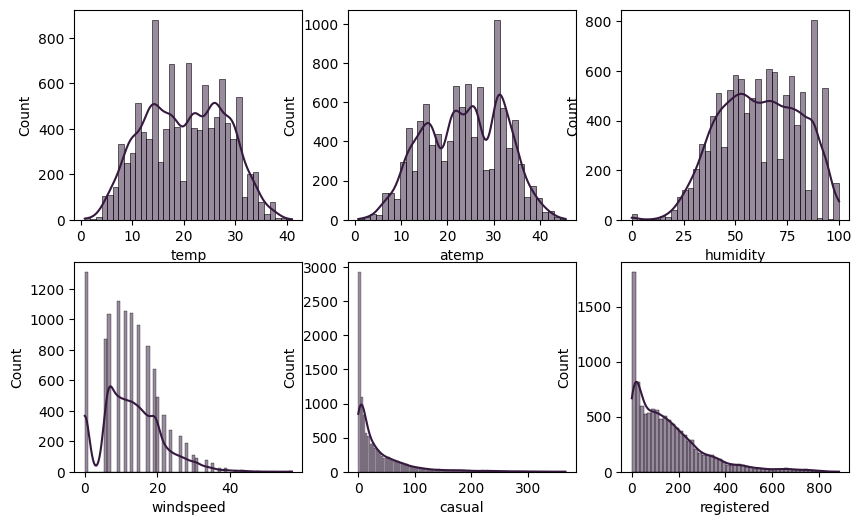

In [44]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()


* casual, registered and count somewhat looks like Log Normal Distrinution
* temp, atemp and humidity looks like they follows the Normal Distribution
* windspeed follows the binomial distribution

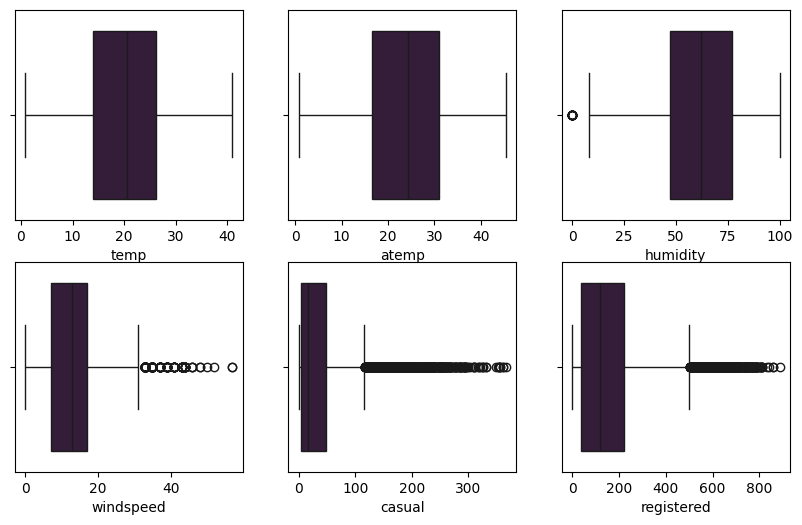

In [46]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()


* Looks like humidity, casual, registered and count have outliers in the data.


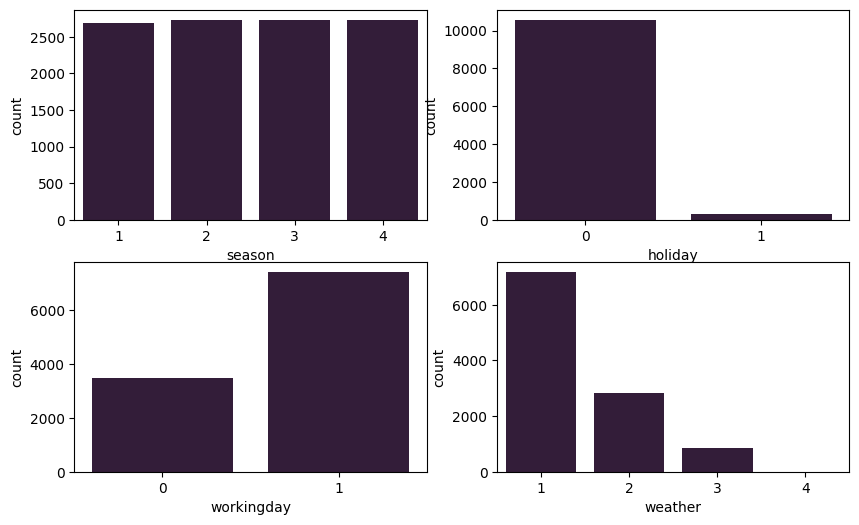

In [49]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

* Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

**Bi-variate Analysis**



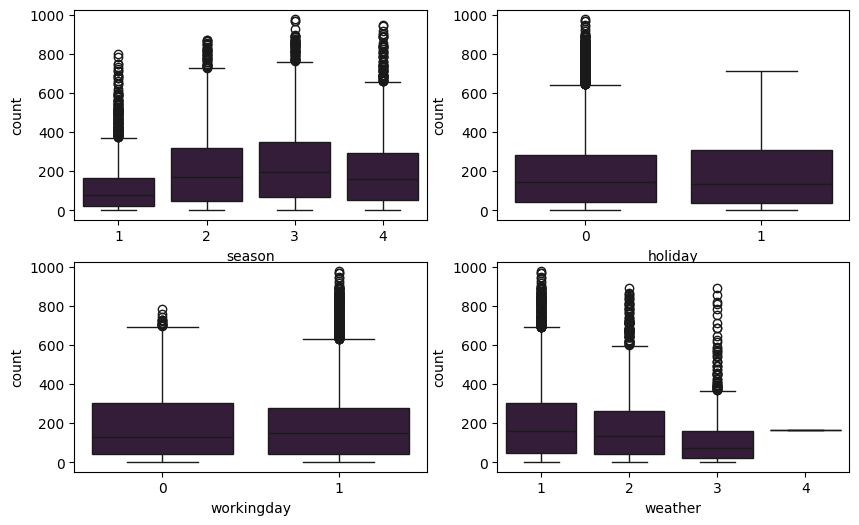

In [51]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

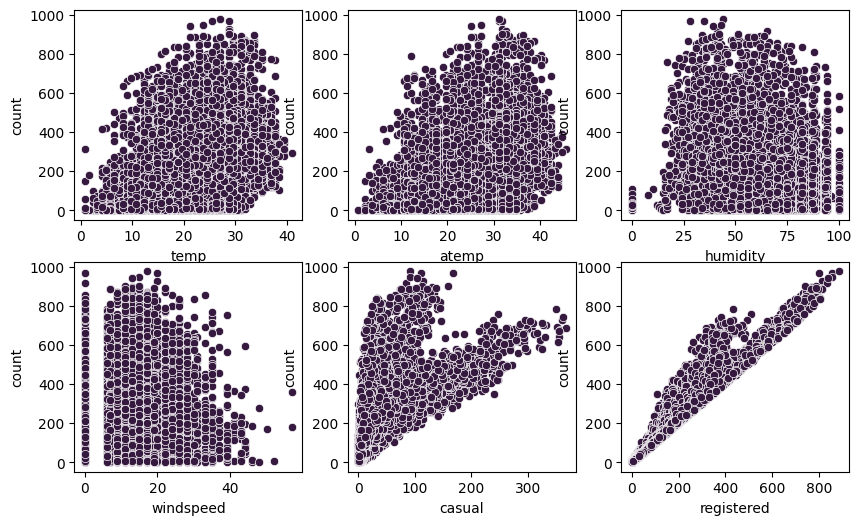

In [58]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

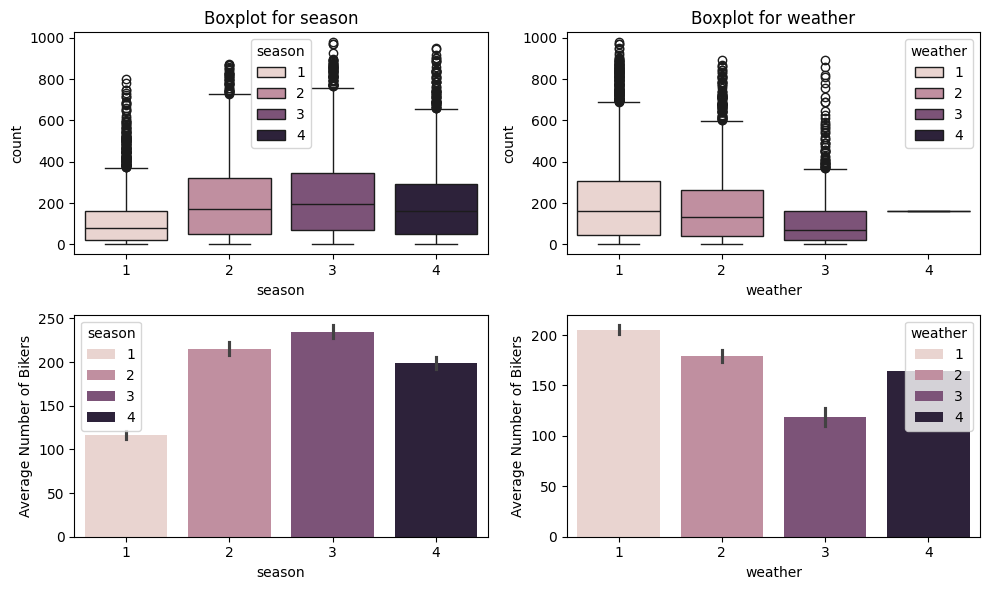

In [17]:
# create subplots
fig, axes = plt.subplots(2,2, figsize=(10,6))

#Plot 1 : Boxplot for seasons
sns.boxplot(data = df , x = "season" , y = "count" , hue = "season" , ax = axes[0,0])
axes[0,0].set_title("Boxplot for season")

#Plot 2 : Boxplot for weather
sns.boxplot(data = df , x = "weather" , y = "count" , hue = "weather" , ax = axes[0,1])
axes[0,1].set_title("Boxplot for weather")

#Plot 3 : Barplot for season
sns.barplot(data = df , x = "season" , y = "count" , hue = "season" , ax = axes[1,0])
# axes[1,0].set_title("Barplot for season")
axes[1,0].set_ylabel("Average Number of Bikers")

#Plot 4 : Barplot for weather
sns.barplot(data = df , x = "weather" , y = "count" , hue = "weather" , ax = axes[1,1])
# axes[1,1].set_title("Barplot for weather")
axes[1,1].set_ylabel("Average Number of Bikers")


plt.tight_layout()
plt.show()

After the usual EDA is done, let’s explore the different statistical tests through our questions.

# **3. Hypothesis Testing:**

**Q1) Effect of Working Day on Bike Rentals**


It is important to first check the sample size of all the groups of a column (working day) to avoid any bias in sample testing




In [18]:
# check sample size of working day

df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


Check the average rentals of each category to get an idea on to set up the hypothesis

In [19]:
df.groupby('workingday')['count'].mean()

,count
workingday,
0,188.506621
1,193.011873


**Set up Null hypothesis (H0) & Alternative hypothesis (Ha):**

**H0:** Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day

**Ha:** Average number of bike rentals on the working day is greater than the average number of bike rentals on the non-working day

Choosing the test: (To understand the theory of different statistical tests, please click here)

**T-test independent:**

To compare the means of 2 independent sample groups (working day and non-working day), independent t-test is chosen.

Extract the sample data from the data frame

In [20]:
#Group 1

working_day = df[df['workingday'] == 1]['count'].sample(3474)

#Group 2

non_working_day = df[df['workingday'] == 0]['count'].sample(3474)

#ttest

t_stat, p_value = ttest_ind(working_day, non_working_day, alternative = "greater")


Calculate p-value from the t-test and compare it with alpha (usually 0.05)



In [21]:
# compare p-value with alpha

alpha = 0.05
print("alpha : " , alpha)
print("p-value : " , p_value)



if p_value < alpha:
    print("Reject the null hypothesis")
    print("Average number of bike rentals on the working day is greater than the average number of bike rentals on the non-working day")
else:
    print("Fail to reject the null hypothesis")
    print("Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day")

alpha :  0.05
p-value :  0.13995181529803769
Fail to reject the null hypothesis
Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day


Since p_value is 0.195 and is greater than alpha, we failed to reject the null hypothesis.

**So, the average number of rentals on working day is same as that of non-working day.**

**Q2) Effect of season on bike rentals**

Check the sample sizes and the means of sample for each category in the season

In [22]:
#Check sample size for season

df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [23]:
df.groupby('season')['count'].mean()

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


Set up the Null hypothesis and Alternate hypothesis:

In [24]:
#Set up the Null hypothesis and Alternate hypothesis:

H0 = "Average number of bike rented is same for all seasons"
Ha = "Average number of bike rented is different for atleast one season"

**One-way ANOVA test:**

To compare the means of 4 independent groups, the Anova test is selected.

Assumptions of Anova:
1. Data should follow a Gaussian distribution
2. Independent groups
3. Equal variance in all the groups



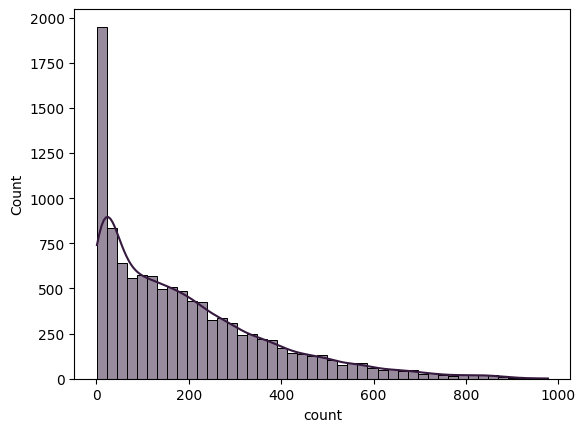

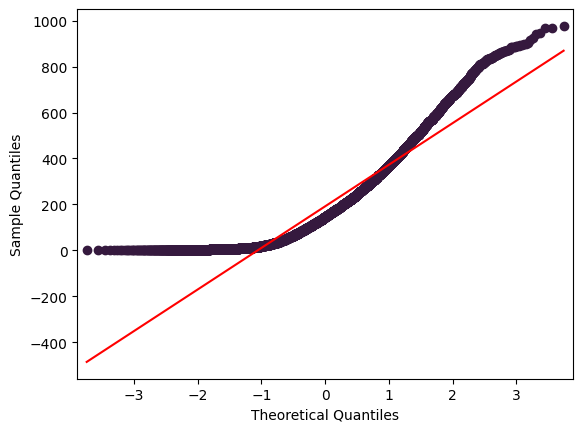

In [30]:
#Check normality and qqplot for the data

sns.histplot(df['count'],kde= "True")
plt.show()

#QQplot

qqplot(df['count'], line='s')
plt.show()

1. From the plots, it is clear that the data is not a normal distribution.

2. Independent groups — this condition is already satisfied since all seasons are independent of each other

3. Check if all groups have same variance: For this, levene test is used.

In [32]:
#Test of equal variance

spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

tstat , p_value = levene(spring, summer, fall, winter)

H0 = "All variances are equal"
Ha = "All variances are not equal"

alpha = 0.05
print("alpha : " , alpha)
print("p-value : " , p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
    print(Ha)
else:
    print("Fail to reject the null hypothesis")
    print(H0)


alpha :  0.05
p-value :  1.0147116860043298e-118
Reject the null hypothesis
All variances are not equal


From the output, it is clear that variance is not same for all seasons and third assumption failed.

This data is not suitable to perform a ANOVA test since the first and third assumptions are not met.

This is what can happen in business scenarios. Not every theory can be applied to the business problem. But there is a way for everything.

Since Anova is failed, let's try **Kruskal** test

In [34]:
#Kruskal test

H0 = "Average number of bike rented is same for all seasons"
Ha = "Average number of bike rented is different for diffrent seasons"

stat, p_value = kruskal(spring, summer, fall, winter)

print("alpha : " , alpha)
print("p-value : " , p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
    print(Ha)
else:
    print("Fail to reject the null hypothesis")
    print(H0)

alpha :  0.05
p-value :  2.479008372608633e-151
Reject the null hypothesis
Average number of bike rented is different for diffrent seasons


**The average number of rentals is different for different seasons.**

Same way, we can try these tests for weather and complete Q3. It is similar to what we did for seasons.

**Q3. Effect of weather on bike rentals**

In [37]:
#Test of equal variance

clear = df[df['weather'] == 1]['count']
mist = df[df['weather'] == 2]['count']
snow = df[df['weather'] == 3]['count']
Thunder = df[df['weather'] == 4]['count']

tstat , p_value = levene(clear, mist, snow, Thunder)

H0 = "All variances are equal"
Ha = "All variances are not equal"

alpha = 0.05
print("alpha : " , alpha)
print("p-value : " , p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
    print(Ha)
else:
    print("Fail to reject the null hypothesis")
    print(H0)

alpha :  0.05
p-value :  3.504937946833238e-35
Reject the null hypothesis
All variances are not equal


From the output, it is clear that variance is not same for all seasons and third assumption failed.

This data is not suitable to perform a ANOVA test since the first and third assumptions are not met.

This is what can happen in business scenarios. Not every theory can be applied to the business problem. But there is a way for everything.

Since Anova is failed, let's try **Kruskal** test

In [38]:
#Kruskal test

H0 = "Average number of bike rented is same for all weather"
Ha = "Average number of bike rented is different for diffrent weather"

stat, p_value = kruskal(clear, mist, snow, Thunder)

print("alpha : " , alpha)
print("p-value : " , p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
    print(Ha)
else:
    print("Fail to reject the null hypothesis")
    print(H0)

alpha :  0.05
p-value :  3.501611300708679e-44
Reject the null hypothesis
Average number of bike rented is different for diffrent weather


**The average number of rentals is different for different Weather.**

**Q4) Is weather and season dependent?**

Well, the general answer might be yes but let's find if this is statistically significant to claim our assumption for this data.

**Chi2_Contingency Test:**

To check if there is a significant relationship between 2 categorical variables, chi square test of independence can be used.

**Set up Null & Alternate hypothesis:**

In [39]:
# Setup Null and Alternate hypothesis

H0 = "Weather and season are independent"
Ha = "Weather and season are dependent"

Using **crosstab** function in python to get the relative numbers of the 2 categorical variables.

In [40]:
ws = pd.crosstab(df['weather'], df['season'])
ws

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


Calculate the p-value and compare it with alpha.

In [41]:
#chi2_contingency test

stat, p, dof, expected = chi2_contingency(ws)

print("alpha : " , alpha)
print("p-value : " , p)

if p < alpha:
    print("Reject the null hypothesis")
    print(Ha)
else:
    print("Fail to reject the null hypothesis")
    print(H0)

alpha :  0.05
p-value :  1.5499250736864862e-07
Reject the null hypothesis
Weather and season are dependent


It appears that our intuition about the dependency between weather and season is statistically significant.

# **Conclusion**:

**T-test of independence:** To determine if there is a significant difference bewteen 2 sample groups (higher or lower or not equal)

**Result:** There is no statistically significant difference on average number of rentals between working day and non-working day

**ANOVA Test:** To compare means of 3 or more groups to understand if at least one group mean is significantly different from the others.

**Result:** Failed to satisfy the assumptions of ANOVA test but got the approximate results using Kruskal test.

**Chi-Square Test of Independence:** To check if there is a significant relationship between 2 categorical variables

**Result:** Weather and Season are significantly dependent



**Insights**

* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

**Recommendations**

* In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temprature is less than 10 or in very cold days, company should have less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.